In [1]:
import wfdb
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [2]:
data_root=('/home/cps_lab/seungeun/ecg/mit-bih-arrhythmia-database-1.0.0')
arr_db = wfdb.get_record_list('mitdb')

In [3]:
signal_1 = wfdb.rdrecord((os.path.join(data_root, arr_db[0])), channels=[0]).p_signal[:, 0]

In [4]:
annotation = wfdb.rdann((os.path.join(data_root, arr_db[0])), extension="atr")

In [5]:
r_peaks, labels = annotation.sample, np.array(annotation.symbol)

In [6]:
r_peaks

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [7]:
signal = np.array([])

for i in range(10):
    if r_peaks[i] < 150 :
        i += 1
    sample_from = r_peaks[i] - 150
    sample_to = r_peaks[i] + 150
    tmp = signal_1[sample_from : sample_to]
    signal = np.append(signal, tmp, axis =0)
    
    

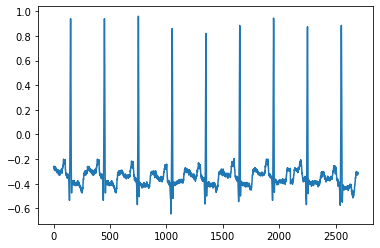

In [8]:
from matplotlib import pyplot as plt
plt.plot(signal)

In [9]:
def to_df(ecg_data):
    signal = []
    anno= []
    dic = {"signal":signal, "anno": anno}
    signal_1 = wfdb.rdrecord(ecg_data, channels=[0]).p_signal[:, 0]
    annotation = wfdb.rdann(ecg_data, extension="atr")
    r_peaks, labels = annotation.sample, np.array(annotation.symbol)
    
    for i in range(len(r_peaks)):
        if r_peaks[i]<150 or r_peaks[i]>len(signal_1)-150:
            i +=1
            continue
        sample_from = r_peaks[i] -150
        sample_to = r_peaks[i] + 150
        tmp = signal_1[sample_from : sample_to]
        signal.append(tmp)
        anno.append(labels[i])
        
    return pd.DataFrame(dic)


In [10]:
merge_df = pd.DataFrame(columns = ['signal','anno'])
for j in arr_db:
    path = os.path.join(data_root, j)
    n_df = to_df(path)
    x = pd.concat([merge_df, n_df],ignore_index=True)
    merge_df = x

In [11]:
merge_df

,signal,anno
0,"[-0.26, -0.265, -0.27, -0.265, -0.26, -0.275, ...",N
1,"[-0.315, -0.305, -0.315, -0.315, -0.31, -0.295...",N
2,"[-0.32, -0.325, -0.305, -0.31, -0.295, -0.31, ...",N
3,"[-0.295, -0.285, -0.3, -0.305, -0.3, -0.295, -...",N
4,"[-0.305, -0.3, -0.285, -0.28, -0.29, -0.295, -...",N
...,...,...
112546,"[-0.25, -0.25, -0.255, -0.265, -0.28, -0.27, -...",N
112547,"[-0.215, -0.215, -0.225, -0.205, -0.19, -0.17,...",N
112548,"[-0.25, -0.23, -0.22, -0.23, -0.22, -0.225, -0...",N
112549,"[-0.25, -0.245, -0.225, -0.22, -0.21, -0.195, ...",N


In [12]:
# annotation Grouping

Non_beat = ['[', '!', ']','x','(',')','P','t','u','`','\'', '^','|','~','+','s','T','*','D','=','\"','@']

group = {'N':['N','L',"R",'e','g','j'],
         'SVEB': ['A','a','J','S'],
         'VEB': ['V','E'],
         'F': ['F'],
         'Q' : ['P','/','U','f'],
         'Non':Non_beat}

#replace
for k, v in group.items():
    merge_df['anno'] = merge_df['anno'].replace(v,k)
    
#non값 삭제
merge_df= merge_df[merge_df['anno'] != "Non"]

# label
merge_df['label']= merge_df['anno'].replace({'N': 0, 'Q':1, 'VEB':2, 'SVEB':3, 'F':4})

/tmp/ipykernel_47697/464667721.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['label']= merge_df['anno'].replace({'N': 0, 'Q':1, 'VEB':2, 'SVEB':3, 'F':4})


In [13]:
merge_df

,signal,anno,label
0,"[-0.26, -0.265, -0.27, -0.265, -0.26, -0.275, ...",N,0
1,"[-0.315, -0.305, -0.315, -0.315, -0.31, -0.295...",N,0
2,"[-0.32, -0.325, -0.305, -0.31, -0.295, -0.31, ...",N,0
3,"[-0.295, -0.285, -0.3, -0.305, -0.3, -0.295, -...",N,0
4,"[-0.305, -0.3, -0.285, -0.28, -0.29, -0.295, -...",N,0
...,...,...,...
112546,"[-0.25, -0.25, -0.255, -0.265, -0.28, -0.27, -...",N,0
112547,"[-0.215, -0.215, -0.225, -0.205, -0.19, -0.17,...",N,0
112548,"[-0.25, -0.23, -0.22, -0.23, -0.22, -0.225, -0...",N,0
112549,"[-0.25, -0.245, -0.225, -0.22, -0.21, -0.195, ...",N,0


In [14]:
np.save('./data.npy',merge_df)

In [15]:
merge_df.to_pickle("./merge_df.pkl")

In [16]:
data = pd.read_pickle("./merge_df.pkl")

In [17]:
data.head()

,signal,anno,label
0,"[-0.26, -0.265, -0.27, -0.265, -0.26, -0.275, ...",N,0
1,"[-0.315, -0.305, -0.315, -0.315, -0.31, -0.295...",N,0
2,"[-0.32, -0.325, -0.305, -0.31, -0.295, -0.31, ...",N,0
3,"[-0.295, -0.285, -0.3, -0.305, -0.3, -0.295, -...",N,0
4,"[-0.305, -0.3, -0.285, -0.28, -0.29, -0.295, -...",N,0


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

In [19]:
train_set

,signal,anno,label
71897,"[-0.225, -0.21, -0.195, -0.195, -0.2, -0.195, ...",N,0
57930,"[0.38, 0.375, 0.37, 0.4, 0.455, 0.5, 0.545, 0....",VEB,2
40586,"[-1.085, -1.08, -1.075, -1.09, -1.095, -1.1, -...",N,0
32461,"[-1.21, -1.21, -1.21, -1.21, -1.225, -1.215, -...",VEB,2
80816,"[-0.295, -0.29, -0.275, -0.285, -0.255, -0.26,...",N,0
...,...,...,...
43142,"[-0.845, -0.835, -0.815, -0.815, -0.835, -0.85...",N,0
4576,"[-0.27, -0.285, -0.27, -0.265, -0.265, -0.285,...",Q,1
11391,"[-0.155, -0.19, -0.2, -0.2, -0.18, -0.16, -0.1...",N,0
59599,"[-0.26, -0.265, -0.26, -0.255, -0.245, -0.225,...",N,0


In [20]:
train_set.shape

(87555, 3)

In [21]:
# x_train = signal to numpy(87555, 300)

In [22]:
x_train = train_set[['signal']].to_numpy()
y_train = train_set[['label']].to_numpy()

In [23]:
#x_train[:,0][:]

In [24]:
#type(x_train)

In [25]:
#x_train

In [26]:
#x_train[0][0]

In [27]:
#x_train[2][0]

In [28]:
new_list = []
for x in range(len(x_train)):
    new_list.append(np.array(x_train[x][0]))

new_list=np.array(new_list)

In [29]:
x_train = new_list

In [30]:
x_train.shape

(87555, 300)

In [31]:
y_train.shape

(87555, 1)

In [32]:
test_set

,signal,anno,label
36075,"[-0.93, -0.91, -0.92, -0.9, -0.89, -0.89, -0.9...",N,0
98612,"[-0.18, -0.195, -0.19, -0.185, -0.18, -0.15, -...",N,0
41074,"[-0.66, -0.665, -0.655, -0.655, -0.665, -0.67,...",N,0
27213,"[-0.425, -0.43, -0.445, -0.44, -0.45, -0.425, ...",N,0
41004,"[-1.34, -1.335, -1.355, -1.38, -1.395, -1.395,...",N,0
...,...,...,...
65520,"[-0.275, -0.36, -0.485, -0.53, -0.45, -0.345, ...",F,4
96449,"[-0.505, -0.495, -0.455, -0.435, -0.37, -0.32,...",VEB,2
5384,"[-0.235, -0.225, -0.245, -0.25, -0.26, -0.255,...",Q,1
64546,"[0.1, 0.095, 0.105, 0.095, 0.125, 0.16, 0.185,...",F,4


In [33]:
x_test = test_set[['signal']].to_numpy()
y_test = test_set[['label']].to_numpy()

tmp = []
for x in range(len(x_test)):
    tmp.append(np.array(x_test[x][0]))

tmp=np.array(tmp)

In [34]:
x_test = tmp

In [35]:
del tmp

In [36]:
x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
y_train = y_train.reshape(len(y_train), y_train.shape[1],1)

In [37]:
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)
y_test = y_test.reshape(len(y_test), y_test.shape[1],1)

In [38]:
x_train.shape

(87555, 300, 1)

In [39]:
x_train

array([[[-0.225],
        [-0.21 ],
        [-0.195],
        ...,
        [-0.29 ],
        [-0.29 ],
        [-0.295]],

       [[ 0.38 ],
        [ 0.375],
        [ 0.37 ],
        ...,
        [-0.08 ],
        [-0.075],
        [-0.085]],

       [[-1.085],
        [-1.08 ],
        [-1.075],
        ...,
        [-1.165],
        [-1.18 ],
        [-1.185]],

       ...,

       [[-0.155],
        [-0.19 ],
        [-0.2  ],
        ...,
        [-0.265],
        [-0.27 ],
        [-0.265]],

       [[-0.26 ],
        [-0.265],
        [-0.26 ],
        ...,
        [-0.27 ],
        [-0.28 ],
        [-0.285]],

       [[-0.81 ],
        [-0.805],
        [-0.795],
        ...,
        [-0.72 ],
        [-0.71 ],
        [-0.7  ]]])

In [40]:
y_train.shape

(87555, 1, 1)

In [44]:
y_train

array([[[0]],

       [[2]],

       [[0]],

       ...,

       [[0]],

       [[0]],

       [[0]]])

In [45]:
y_onehot = tf.keras.utils.to_categorical(y_train)


In [43]:
y_onehot.shape

(87555, 1, 5)

In [46]:
y_train = y_onehot.reshape(len(y_train), y_onehot.shape[2],1)

In [47]:
y_train

array([[[1.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [66]:
y_train = y_train.squeeze(-1)

In [67]:
y_train.shape

(87555, 5)

In [68]:
input_shape = (x_train.shape[1], x_train.shape[2])
output_size = 5

In [69]:
print(input_shape)

(300, 1)


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7180882/table/sensors-20-02136-t001/?report=objectonly

In [70]:
import os

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization

In [72]:
model = Sequential()


model.add(Conv1D(activation='relu', input_shape=input_shape, filters=32, kernel_size=5, padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2,padding='same'))

model.add(Conv1D(activation='relu', filters=32, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(activation='relu', filters=64, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(activation='relu', filters=128, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(activation='relu', filters=128, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(activation='relu',  filters=256, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))

model.add(Conv1D(activation='relu',  filters=256, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2 , padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(activation='relu',  filters=512, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(activation='relu',  filters=512, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(activation='relu',  filters=512, kernel_size=5, padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 300, 32)           192       
                                                                 
 batch_normalization_2 (Batc  (None, 300, 32)          128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 150, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 150, 32)           5152      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 75, 32)           0         
 g1D)                                                            
                                                      

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
tf.config.run_functions_eagerly(True)

In [77]:
model.fit(x_train, y_train)

2737/2737 [==============================] - 102s 37ms/step - loss: 0.2575 - accuracy: 0.9330


In [78]:
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_test_onehot = y_test_onehot.reshape(len(y_test), y_test_onehot.shape[2],1)

In [79]:
y_pred = model.predict(x_test)

In [82]:
y_pred

array([[9.3414736e-01, 5.3609452e-05, 2.7979102e-03, 6.1065752e-02,
        1.9353667e-03],
       [9.1604149e-01, 1.4114106e-04, 4.9649281e-03, 7.5372361e-02,
        3.4801106e-03],
       [9.7937679e-01, 4.1061122e-07, 1.3596404e-04, 2.0385191e-02,
        1.0153030e-04],
       ...,
       [4.7694552e-13, 1.0000000e+00, 1.7590602e-18, 5.1224764e-27,
        1.3467622e-29],
       [9.4765924e-02, 1.8696293e-02, 7.2577041e-01, 5.1026378e-02,
        1.0974103e-01],
       [9.9070966e-01, 1.3345292e-08, 1.5916383e-05, 9.2618447e-03,
        1.2601562e-05]], dtype=float32)

In [84]:
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

Normalized confusion matrix


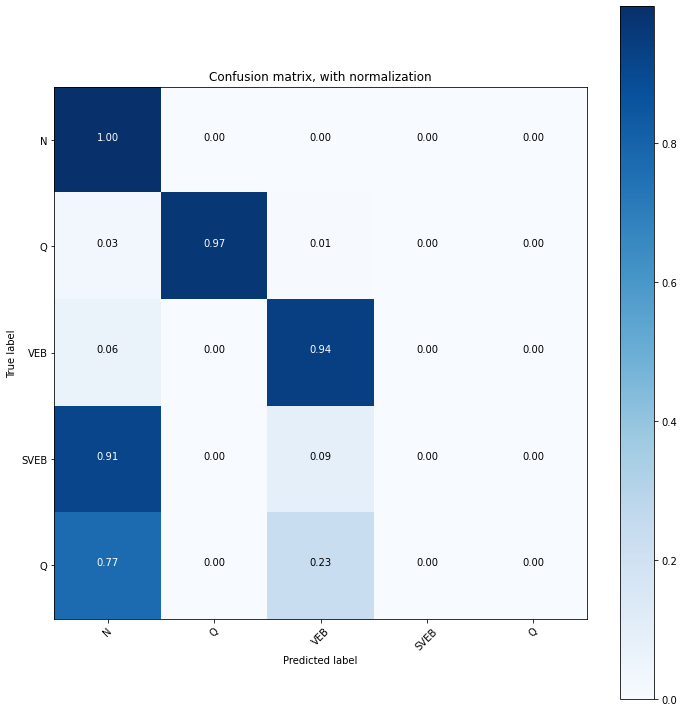

In [88]:
#'N': 0, 'Q':1, 'VEB':2, 'SVEB':3, 'F':4

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'Q', 'VEB', 'SVEB', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [89]:
y_pred

array([[9.34e-01, 5.36e-05, 2.80e-03, 6.11e-02, 1.94e-03],
       [9.16e-01, 1.41e-04, 4.96e-03, 7.54e-02, 3.48e-03],
       [9.79e-01, 4.11e-07, 1.36e-04, 2.04e-02, 1.02e-04],
       ...,
       [4.77e-13, 1.00e+00, 1.76e-18, 5.12e-27, 1.35e-29],
       [9.48e-02, 1.87e-02, 7.26e-01, 5.10e-02, 1.10e-01],
       [9.91e-01, 1.33e-08, 1.59e-05, 9.26e-03, 1.26e-05]], dtype=float32)

In [83]:
import ipywidgets